In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pkgs.regression import Regression, BayesianRegression

In [2]:
def f(X):
    return np.sin(2*np.pi*X)

In [3]:
def random_X_Y(n:int=10, seed:int=10):
    np.random.seed(seed)
    X = np.random.uniform(0.0, 1.0, size=n)
    Y = f(X) + np.random.normal(0,.3, size=len(X))

    return X, Y


In [4]:
def set_X_Y():
    np.random.seed(4) 

    X = np.linspace(0, 1.0, 11)
    Y = f(X) + np.random.normal(0,.3, size=len(X))
    return X, Y

X, Y = set_X_Y()
x_plot = np.linspace(0, 1.0, 101)

Text(0.5, 0.98, 'Polynomial Fit - degree: 0, 1, 2, 3, 5, 7, 9')

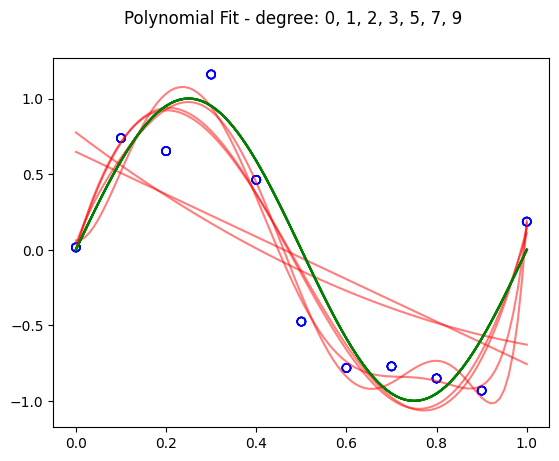

In [5]:
poly_degrees = [1, 2, 3, 5, 7, 9]

fig, ax = plt.subplots()

for i in poly_degrees:
    model = Regression(poly_dim=i, lam=0)
    model.fit(X, Y)

    ax.scatter(X, Y, facecolors="none", edgecolors="blue")
    t = model.predict(x_plot)

    ax.plot(x_plot, t, color="red", alpha=0.5)
    ax.plot(x_plot, f(x_plot), color="green")


plt.suptitle(f"Polynomial Fit - degree: 0, 1, 2, 3, 5, 7, 9")


## Ridge Regression

Text(0.5, 0.98, 'PolyFit - for j=3, log(lambda)=-18, -9, -6, 0')

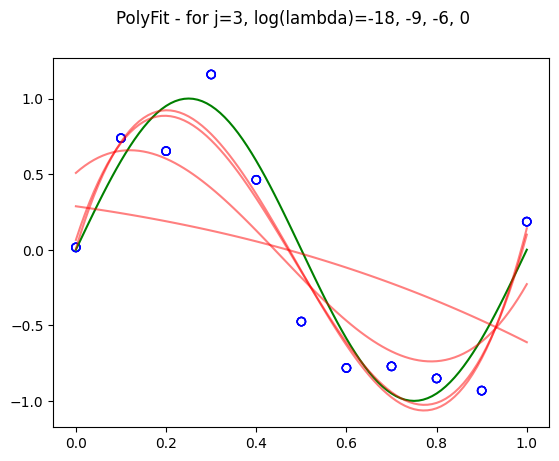

In [6]:
fig, ax = plt.subplots()
ax.plot(x_plot, f(x_plot), color="green")

for lam in [np.exp(-18), np.exp(-9), np.exp(-6), np.exp(0)]:
    model = Regression(lam)
    model.fit(X, Y)

    ax.scatter(X, Y, facecolors="none", edgecolors="blue")

    t = model.predict(x_plot).squeeze()

    ax.plot(x_plot, t, color="red", alpha=0.5)

plt.suptitle("PolyFit - for j=3, log(lambda)=-18, -9, -6, 0")

## Bayesian Regression

Maximize for $w$ and $\beta$ given the Log likelihood function

$
\ln p(t | x, w, \beta) = -\frac {\beta} {2} \sum \{ y(x_n,w) - t_n \}^2 + \frac {N}{2} \ln(\beta) - \frac {N}{2} \ln (2\pi)
$ 

First we find the $w_{ml}$ by minimizing the negative of the log likelihood.  Then we find the the maximum likelihood solution for $\beta$ which is given by

$ \frac {1} {\beta_{ml}} = \frac {1}{N} \sum \{ y(x_n,w_{ml}) - t_n \}^2 $



Incorporating a prior on the weights we will actually minimize the following: $\sum \{ y(x_n,w) - t_n \}^2 $

Maximize the following: $ \ln p(w|t) = - \frac {\beta}{2} \sum \{ t_n - w^T \phi (x_n) \}^2 - \frac {\alpha}{2} w^T w + const$

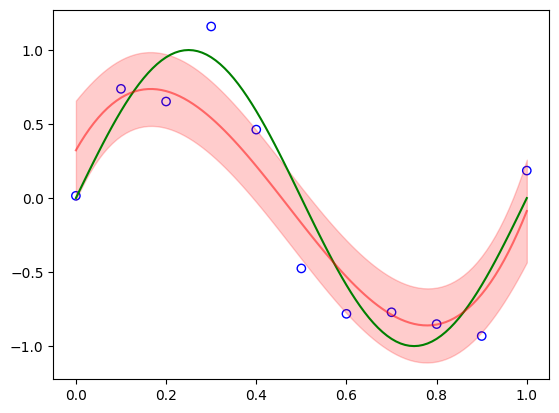

In [7]:
fig, ax = plt.subplots()

ax.scatter(X, Y, facecolors="none", edgecolors="blue")
ax.plot(x_plot, f(x_plot), color="green")

model = BayesianRegression()
model.fit(X, Y)

t, sigma = model.predict(x_plot)

t = t.squeeze()

ax.plot(x_plot, t, color="red", alpha=0.5)
ax.fill_between(x=x_plot.squeeze(), y1=t + np.diag(sigma), y2=t - np.diag(sigma), color="red", alpha=0.2)

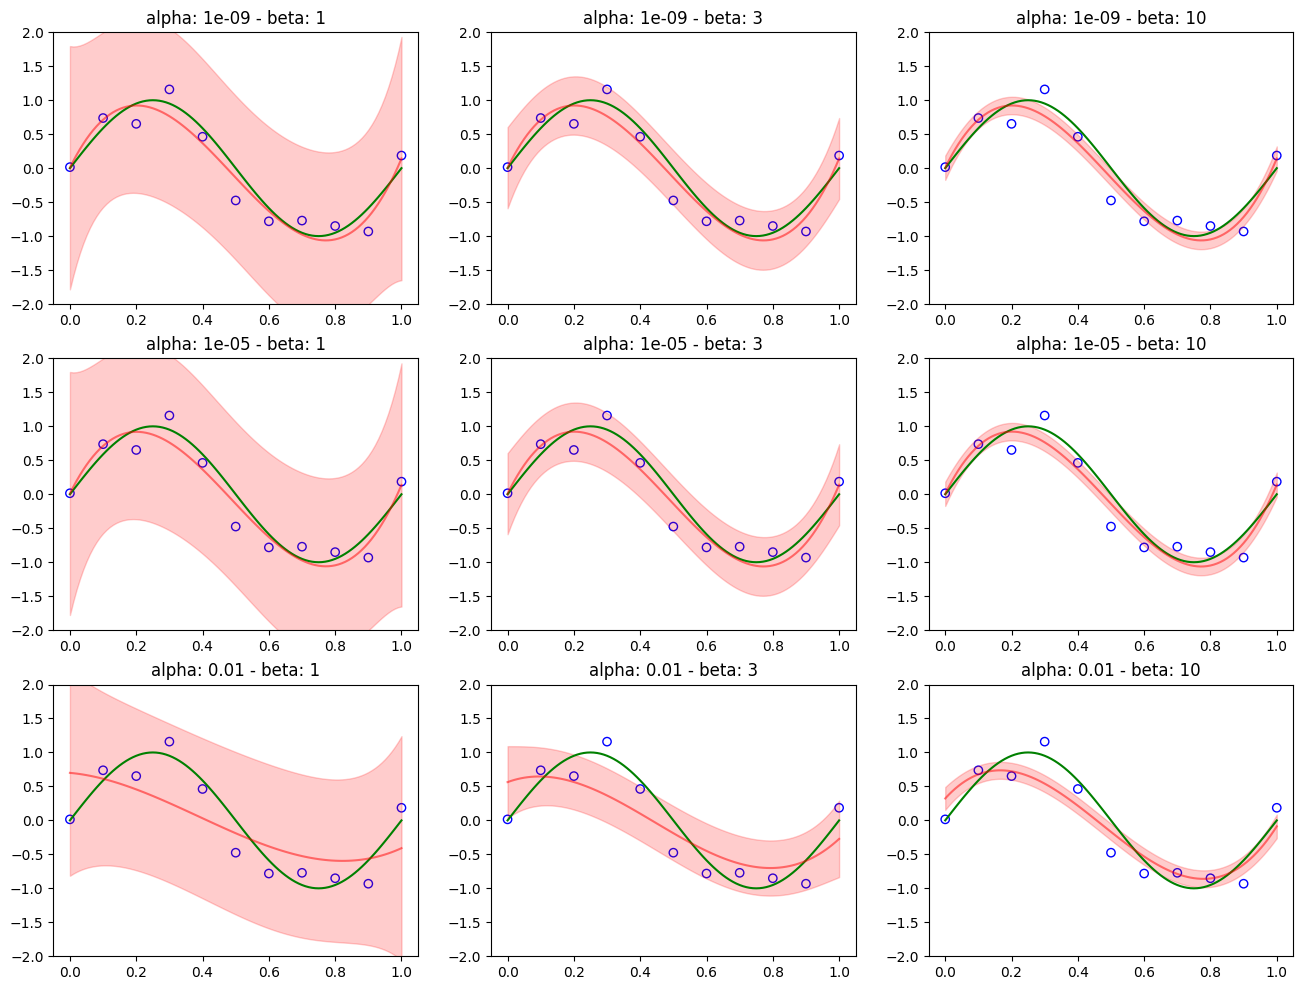

In [8]:
fig, axs = plt.subplots(3,3, figsize=(16,12))

alpha = [1e-9, 1e-5, 1e-2]
beta = [1, 3, 10]

X, Y = set_X_Y()

z = 0
for i in range(3):
    for j in range(3):
        a = alpha[i]
        b = beta[j]

        model = BayesianRegression(alpha=a, beta=b)
        model.fit(X, Y)
        ax = axs[i,j]
        ax.set_ylim(-2,2)
        ax.scatter(X, Y, facecolors="none", edgecolors="blue")
        z += 1  

        t, sigma = model.predict(x_plot)
        t = t.squeeze()
        ax.plot(x_plot, f(x_plot), color="green")
        ax.plot(x_plot, t, color="red", alpha=0.5)
        ax.fill_between(x=x_plot.squeeze(), y1=t + np.diag(sigma), y2=t - np.diag(sigma), color="red", alpha=0.2)
        ax.set_title(f"alpha: {a} - beta: {b}")

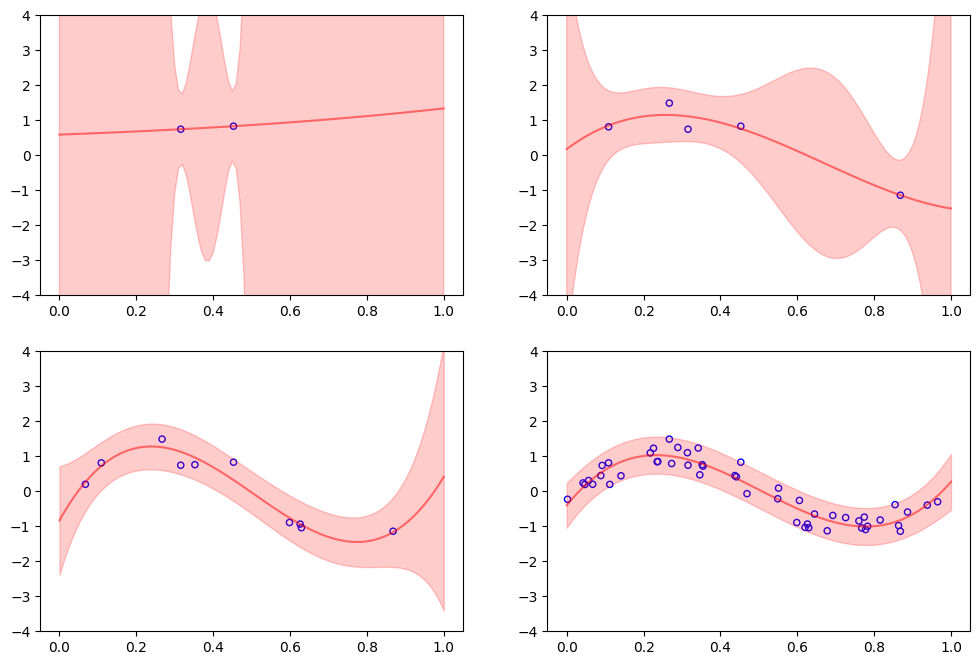

In [9]:
fig, axs = plt.subplots(2,2, figsize=(12,8))

points = [2, 5, 10, 50]

X, Y = random_X_Y(100, seed=420)

z = 0
for i in range(2):
    for j in range(2):
        n_points = points[z]
        model = BayesianRegression(alpha=1e-5, beta=2)
        model.fit(X[:n_points], Y[:n_points])
        ax = axs[i,j]
        ax.set_ylim(-4,4)
        ax.scatter(X[:n_points], Y[:n_points], facecolors="none", edgecolors="blue", s=20)
        z += 1  

        t, sigma = model.predict(x_plot)
        t = t.squeeze()
        ax.plot(x_plot, t, color="red", alpha=0.5)
        
        ax.fill_between(x=x_plot.squeeze(), y1=t + np.diag(sigma), y2=t - np.diag(sigma), color="red", alpha=0.2)